In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image.shape

(28, 28)

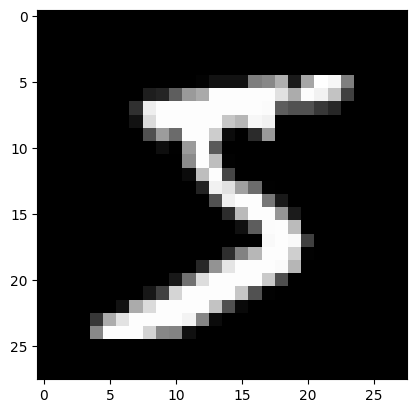

In [7]:
plt.imshow(single_image, cmap='gray')

In [8]:
y_train.min()

0

In [9]:

X_train.max()


255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_test_scaled = X_test / 255.0
X_train_scaled.min()
X_train_scaled.max()
y_train[0]
y_train_onehot = utils.to_categorical(y_train, 10)
y_test_onehot = utils.to_categorical(y_test, 10)

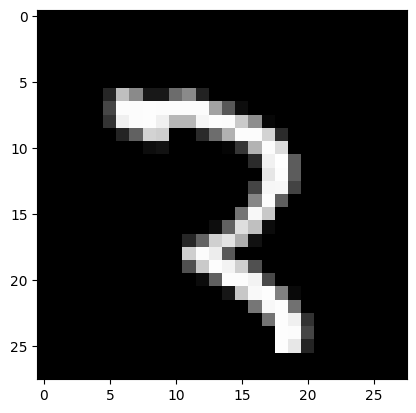

In [12]:
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image, cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [13]:
model = keras.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          86,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,198 (340.62 KB)

 Trainable params: 87,198 (340.62 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # Changed 'accuracy' to ['accuracy']

In [17]:
model.fit(X_train_scaled, y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled, y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.7287 - loss: 0.8449 - val_accuracy: 0.9510 - val_loss: 0.1586
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.9620 - loss: 0.1352 - val_accuracy: 0.9696 - val_loss: 0.1015
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9744 - loss: 0.0844 - val_accuracy: 0.9777 - val_loss: 0.0714
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9804 - loss: 0.0653 - val_accuracy: 0.9780 - val_loss: 0.0643
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.9853 - loss: 0.0512 - val_accuracy: 0.9793 - val_loss: 0.0631


In [18]:

metrics = pd.DataFrame(model.history.history)

In [19]:


metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.867000,0.437483,0.9510,0.158637
1,0.965383,0.120831,0.9696,0.101509
2,0.975400,0.081881,0.9777,0.071442
3,0.980167,0.064672,0.9780,0.064333
4,0.983783,0.054027,0.9793,0.063096


<Axes: >

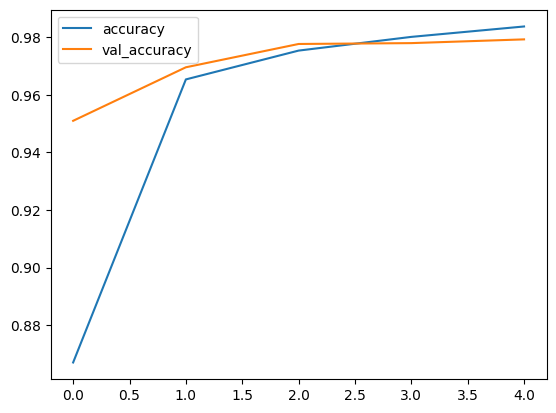

In [20]:


metrics[['accuracy','val_accuracy']].plot()

<Axes: >

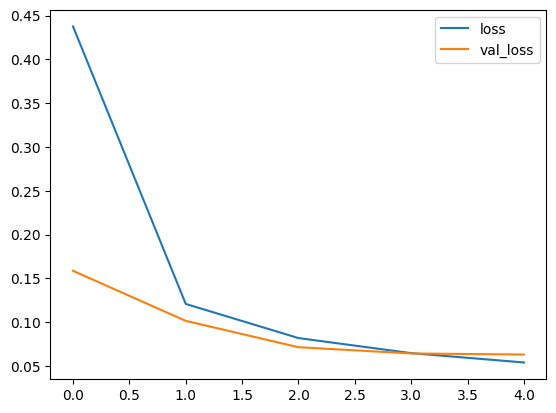

In [21]:
metrics[['loss','val_loss']].plot()

In [22]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [40]:
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

[[ 968    1    1    0    1    3    2    1    3    0]
 [   0 1131    0    1    1    0    1    0    1    0]
 [   4   12  998    4    3    0    1    8    2    0]
 [   0    0    3  997    0    4    0    4    2    0]
 [   1    0    0    0  979    0    0    0    0    2]
 [   2    1    0    9    0  874    5    0    1    0]
 [   3    3    0    0    6    3  940    0    3    0]
 [   1    3    7    1    0    0    0 1011    3    2]
 [   7    0    4    4    7    3    3    6  935    5]
 [   3    3    0    4   17    3    0   12    7  960]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98   

In [41]:
img = image.load_img('/seven.png.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [34]:

print(x_single_prediction)

[1]


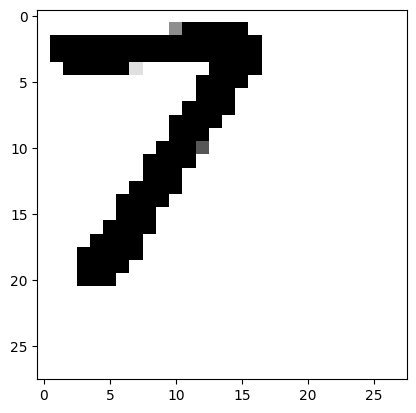

In [35]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [36]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [37]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [38]:


print(x_single_prediction)

[6]
